In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir("C:/Users/HP Pro/Desktop/Machine learning/Projet ML")


In [2]:
base1 = pd.read_csv("C:/Users/HP Pro/Desktop/Machine learning/Projet ML/2015-building-energy-benchmarking.csv")
base1.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
#base1.PrimaryPropertyType.value_counts()
base1.shape
base1.info().head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
OSEBuildingID                                                    3340 non-null int64
DataYear                                                         3340 non-null int64
BuildingType                                                     3340 non-null object
PrimaryPropertyType                                              3340 non-null object
PropertyName                                                     3340 non-null object
TaxParcelIdentificationNumber                                    3338 non-null object
Location                                                         3340 non-null object
CouncilDistrictCode                                              3340 non-null int64
Neighborhood                                                     3340 non-null object
YearBuilt                                                        3340 non-null int64
NumberofBuildings                    

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
colone1 = pd.DataFrame({"col" : base1.columns})
colone1
#base1.CouncilDistrictCode.dtype

In [35]:
base1.describe()

In [8]:
#sélection des potentiels features
#vérifier s'il n'y a pas de correlation entre "Energie" et la variable cible.
# Revoir la variable "OtherFuelUse(kBtu)" qui contient trop de valeurs nulles

features = ["TaxParcelIdentificationNumber", "Location", "CouncilDistrictCode", "YearBuilt", "NumberofBuildings", "NumberofFloors", 
           "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA",
            "ThirdLargestPropertyUseTypeGFA", "ENERGYSTARScore", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)", "SiteEnergyUse(kBtu)", 
           "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)", "NaturalGas(kBtu)",
           "OtherFuelUse(kBtu)", "GHGEmissions(MetricTonsCO2e)", "GHGEmissionsIntensity(kgCO2e/ft2)"]

targets = ["SiteEnergyUseWN(kBtu)" ,"TotalGHGEmissions"]  # TotalGHGEmissions vient de la base2 (2016)
                                                        # pourquoi SiteEnergyUseWN(kBtu) et non SiteEnergyUse(kBtu) comme target?
    
base1[features].shape
    

(3340, 26)

In [9]:
#Détermination du nombre de valeurs manquantes par colone
manquant = base1[features].isnull()
manquant.sum()

TaxParcelIdentificationNumber           2
Location                                0
CouncilDistrictCode                     0
YearBuilt                               0
NumberofBuildings                       0
NumberofFloors                          8
PropertyGFATotal                        0
PropertyGFAParking                      0
PropertyGFABuilding(s)                  0
LargestPropertyUseTypeGFA             136
SecondLargestPropertyUseTypeGFA      1781
ThirdLargestPropertyUseTypeGFA       2780
ENERGYSTARScore                       780
SiteEUI(kBtu/sf)                       10
SiteEUIWN(kBtu/sf)                     10
SourceEUI(kBtu/sf)                     10
SiteEnergyUse(kBtu)                    10
SiteEnergyUseWN(kBtu)                  10
SteamUse(kBtu)                         10
Electricity(kWh)                       10
Electricity(kBtu)                      10
NaturalGas(therms)                     10
NaturalGas(kBtu)                       10
OtherFuelUse(kBtu)                

In [12]:
base = base1[features]
base.shape

(3340, 26)

In [13]:
base["building_age"] = base.YearBuilt.apply(lambda p : 2015 - p)
base.drop("YearBuilt", axis = 1, inplace =True) 


C:\Users\HP Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#description des features
base.describe()

,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),building_age
count,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,...,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,3340.000000
mean,4.450898,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,...,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,47.375150
std,2.127203,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,...,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,32.949847
min,1.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,...,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,19.000000
50%,4.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,...,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,42.000000
75%,7.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,...,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,68.000000
max,7.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,...,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,115.000000


In [6]:
base.drop(["SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"], axis=1, inplace = True)

NameError: name 'base' is not defined

In [15]:
base.shape

(3340, 26)

In [19]:
#Etude des corrélations entre features 
correlation = base.corr()
#correlation

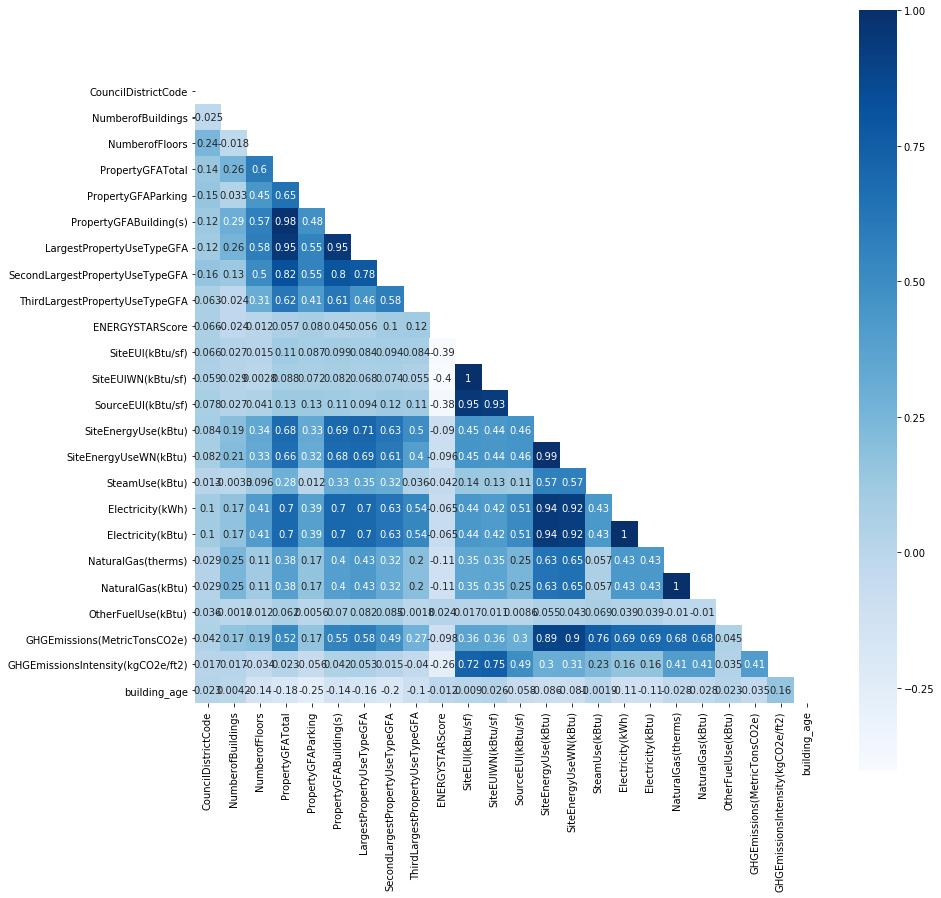

In [17]:
#Recherche des variables qui sont très fortement correlees dans le but d'en supprimer une et de garder l'autre

plt.figure(figsize = (14,14))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, cmap='Blues', annot=True, square=True, mask=mask, cbar=True, vmin=None, vmax=None)
plt.show()

In [191]:
#Sélections des variables qui ont un coefficient de corrélation supérieur au seuil : 0.85

# A revoir!!!!!!!!!!!!

for i in correlation.columns:
    for j in correlation.index:
        if correlation.loc[i,j] > 2:
            ligne = i
            colone = j
            T = [ligne, colone] 
            hyper_correlation.append(T)
        
hyper_correlation = pd.DataFrame(hyper_correlation)
#hyper_correlation.rename(columns = {0 : "ligne", 1 : "colone"})
hyper_correlation.head()

,0,1
0,CouncilDistrictCode,CouncilDistrictCode
1,NumberofBuildings,NumberofBuildings
2,NumberofFloors,NumberofFloors
3,PropertyGFATotal,PropertyGFATotal
4,PropertyGFATotal,PropertyGFABuilding(s)


In [194]:
#Etude des correlation entre les features et la variable cible : "SiteEnergyUseWN(kBtu)" : recherche d'une relation linéaire
#base_augmante = base["output"]
#base1['building_age'] = base["building_age"]
#for i in features:
   # print(base1[[i, "SiteEnergyUseWN(kBtu)"]].corr())
base_augmente = base
base_augmente["target"] = base1["SiteEnergyUseWN(kBtu)"]  
base_augmente.corr()["SiteEnergyUseWN(kBtu)"]


C:\Users\HP Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


CouncilDistrictCode                  0.082095
NumberofBuildings                    0.211656
NumberofFloors                       0.327366
PropertyGFATotal                     0.662026
PropertyGFAParking                   0.315039
PropertyGFABuilding(s)               0.678805
LargestPropertyUseTypeGFA            0.694755
ENERGYSTARScore                     -0.096485
SiteEUI(kBtu/sf)                     0.451588
SiteEUIWN(kBtu/sf)                   0.440636
SourceEUI(kBtu/sf)                   0.456992
SiteEnergyUse(kBtu)                  0.993719
SiteEnergyUseWN(kBtu)                1.000000
SteamUse(kBtu)                       0.571233
Electricity(kWh)                     0.924579
Electricity(kBtu)                    0.924579
NaturalGas(therms)                   0.649597
NaturalGas(kBtu)                     0.649597
OtherFuelUse(kBtu)                   0.043412
GHGEmissions(MetricTonsCO2e)         0.896825
GHGEmissionsIntensity(kgCO2e/ft2)    0.312890
building_age                      

In [205]:
#Analyse de la variable cible
target = base1["SiteEnergyUseWN(kBtu)"]
target.describe()

count    3.330000e+03
mean     5.203055e+06
std      1.400757e+07
min      0.000000e+00
25%      9.883248e+05
50%      1.953996e+06
75%      4.368462e+06
max      2.977410e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

C:\Users\HP Pro\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\HP Pro\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\HP Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


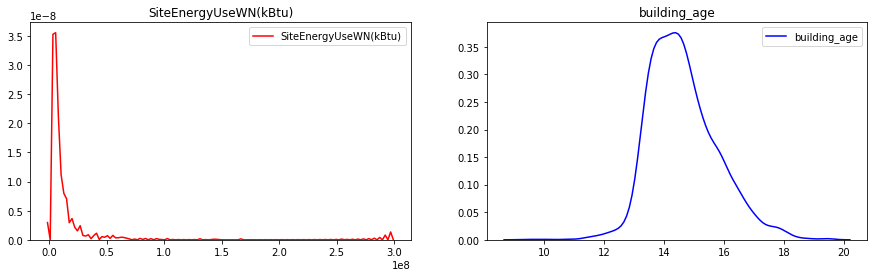

In [240]:
#Analyse de la distribution de la variable cible:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.figure(figsize = (14,5))
#sns.histplot(target, color='b', kde=True)
sns.kdeplot(data = target, label = "SiteEnergyUseWN(kBtu)", color='r', ax=axes[0])
axes[0].set_title('SiteEnergyUseWN(kBtu)')

sns.kdeplot(data = np.log(target), label = "building_age", color='b', ax=axes[1])
axes[1].set_title('building_age')
plt.show()

In [155]:
base2 = pd.read_csv("C:/Users/HP Pro/Desktop/Machine learning/Projet ML/2016-building-energy-benchmarking.csv")
#base2.head()

In [11]:
base2.shape

(3376, 46)

In [156]:
colone2 = pd.DataFrame({"col" : base2.columns})
#colone2

In [13]:
base2.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [157]:
#comparaison des colonnes des deux bases!
colones = colone1.join(colone2, lsuffix = "_2015", rsuffix = "_2016")
#colones

In [158]:
#fusion des deux bases: jointure ou concatenation?
            #ou plutôt
#Utilisation d'une des bases comme jeux de train et de la deuxième comme jeux de dépoiement du modèle?

base = pd.concat([base1, base2])
#base
#base_join = base1.join(base2, lsuffix = "_2015", rsuffix = "_2016")
#base_join

In [45]:
#Etude des correlations entre variables
matrice_cor = base2.corr()
matrice_cor

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,NaN,0.084625,-0.089295,0.092736,0.040473,0.177302,0.025608,-0.103456,-0.136508,...,-0.203420,-0.033588,-0.130168,-0.130168,-0.085620,-0.085620,-0.067432,NaN,-0.100458,-0.034985
DataYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,0.084625,NaN,1.000000,-0.063154,0.030536,-0.120893,0.094818,-0.009582,-0.117719,-0.052669,...,-0.050046,-0.038624,-0.036909,-0.036909,-0.028650,-0.028650,0.016678,NaN,-0.047686,-0.083394
CouncilDistrictCode,-0.089295,NaN,-0.063154,1.000000,0.489348,-0.265482,-0.020560,-0.013174,0.249549,0.098110,...,0.056832,0.007771,0.056176,0.056176,0.003467,0.003467,-0.084379,NaN,0.017442,0.003274
Latitude,0.092736,NaN,0.030536,0.489348,1.000000,0.005250,0.117239,0.020646,-0.023980,-0.018162,...,-0.041985,-0.015448,-0.018924,-0.018924,-0.020860,-0.020860,-0.047652,NaN,-0.026089,-0.040727
Longitude,0.040473,NaN,-0.120893,-0.265482,0.005250,1.000000,-0.051111,0.017858,-0.026054,0.025383,...,0.032156,0.018502,0.026537,0.026537,0.033180,0.033180,0.077219,NaN,0.037411,0.039365
YearBuilt,0.177302,NaN,0.094818,-0.020560,0.117239,-0.051111,1.000000,-0.023712,0.146214,0.100417,...,0.069277,-0.018234,0.039849,0.039849,0.023275,0.023275,0.001704,NaN,0.012831,-0.146212
NumberofBuildings,0.025608,NaN,-0.009582,-0.013174,0.020646,0.017858,-0.023712,1.000000,-0.026386,0.693412,...,0.090486,0.397588,0.735028,0.735028,0.062324,0.062324,-0.010229,NaN,0.405261,0.027564
NumberofFloors,-0.103456,NaN,-0.117719,0.249549,-0.023980,-0.026054,0.146214,-0.026386,1.000000,0.400488,...,0.293096,0.079497,0.251514,0.251514,0.065226,0.065226,-0.073783,NaN,0.136014,-0.042445
PropertyGFATotal,-0.136508,NaN,-0.052669,0.098110,-0.018162,0.025383,0.100417,0.693412,0.400488,1.000000,...,0.400813,0.440568,0.849576,0.849576,0.183408,0.183408,-0.018976,NaN,0.531436,0.020105


In [67]:
#Etude des correlations entre certaines variables spécifiques (les features)

special_cor = base2[['SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)']].corr()
special_cor

,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu)
SiteEUIWN(kBtu/sf),1.000000,0.930434,0.938051,0.272799,0.394437,0.093233,0.253013,0.253013,0.262725,0.262725
SourceEUI(kBtu/sf),0.930434,1.000000,0.994317,0.296804,0.388278,0.090563,0.323180,0.323180,0.177507,0.177507
SourceEUIWN(kBtu/sf),0.938051,0.994317,1.000000,0.268986,0.387075,0.076800,0.293289,0.293289,0.176670,0.176670
SiteEnergyUse(kBtu),0.272799,0.296804,0.268986,1.000000,0.715149,0.604323,0.956556,0.956556,0.514408,0.514408
SiteEnergyUseWN(kBtu),0.394437,0.388278,0.387075,0.715149,1.000000,0.472701,0.587712,0.587712,0.727617,0.727617
SteamUse(kBtu),0.093233,0.090563,0.076800,0.604323,0.472701,1.000000,0.546965,0.546965,0.026827,0.026827
Electricity(kWh),0.253013,0.323180,0.293289,0.956556,0.587712,0.546965,1.000000,1.000000,0.290987,0.290987
Electricity(kBtu),0.253013,0.323180,0.293289,0.956556,0.587712,0.546965,1.000000,1.000000,0.290987,0.290987
NaturalGas(therms),0.262725,0.177507,0.176670,0.514408,0.727617,0.026827,0.290987,0.290987,1.000000,1.000000
NaturalGas(kBtu),0.262725,0.177507,0.176670,0.514408,0.727617,0.026827,0.290987,0.290987,1.000000,1.000000


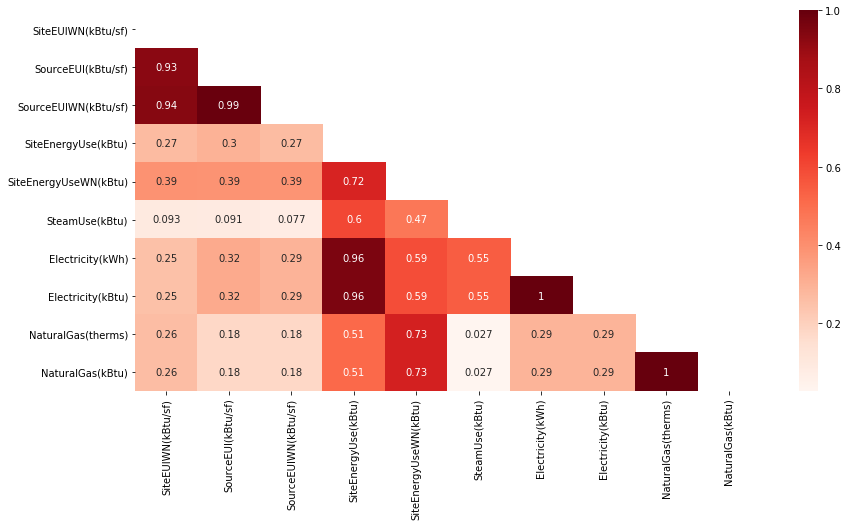

In [89]:
#création d'un heatmap afin de déterminer les zones des fortes corrélations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (14,7))

mask = np.zeros_like(special_cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(special_cor, annot=True, mask=mask, cmap = "Reds")
plt.show()
#sns.lineplot(data = base2.SourceEUI(kBtu/sf))

In [9]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

AttributeError: 'DataFrame' object has no attribute 'X'

In [61]:
import numpy as np
X = base2[["TotalGHGEmissions","GHGEmissionsIntensity"]]
X.dropna(inplace=True)
#X = np.log(X)
y = base2['NaturalGas(kBtu)']
y.dropna(inplace=True)
y, X = y.align(X, join='inner')


C:\Users\HP Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
prediction = pd.Series(model.predict(X), index=X.index)
prediction

0       3.586478e+06
1       3.974291e+06
2       1.782179e+07
3       5.187559e+06
4       5.659063e+06
5       4.192678e+06
6       2.491232e+06
7       2.882090e+06
8       4.408857e+06
9       2.469373e+06
10      8.307128e+06
11      7.073862e+06
12      5.791958e+06
13      6.215212e+06
14      7.610866e+06
15      1.337048e+06
16      6.016275e+06
17      7.361974e+06
18      5.137404e+06
19      4.750133e+06
20      1.134717e+07
21      1.628860e+07
22      3.740514e+05
23      1.020171e+06
24      4.860060e+06
25     -2.523334e+05
26      2.777683e+06
27      3.559703e+06
28     -4.249268e+05
29      1.939378e+06
            ...     
3345    5.273863e+05
3346    8.919446e+05
3347   -2.016200e+05
3349    1.900062e+06
3350    2.684655e+05
3351    2.834653e+05
3352    2.293491e+06
3353    6.247119e+05
3354    4.337481e+06
3355   -1.764121e+05
3356    9.627389e+06
3357    6.836432e+05
3358    3.879643e+05
3359   -1.291364e+04
3360   -2.328395e+05
3361    1.587958e+06
3362    1.125

In [92]:
sns.lineplot(data=prediction)


AttributeError: module 'seaborn' has no attribute 'lineplot'